In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import math
#import pandas as pd
import itertools
import os
#import ROOT
import datetime
#from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial
plt.rcParams.update({'font.size': 16})

In [355]:
volt=550

In [379]:
#serve solo per creare i vettori coordinates e field
#file=open("/Users/davidc/Downloads/simulazioni/Position_particle.txt",'r')
#file.read()
#file2=open("/Users/davidc/Downloads/simulazioni/Field_particle.txt",'r')
#file2.read()
#fin = open("/Users/davidc/Downloads/simulazioni/field_particles_mm3.txt","r")

fin = open("/Users/davidc/Downloads/simulazioni/%sV100m.txt"%volt,"r")

ctr = 0
index=1
for line in fin:
    ctr += 1
    if ( ctr < 9):
        continue
    words = line.split()
    fout = open("/Users/davidc/Downloads/simulazioni/Voltages/%s100/%sV_%s.txt"%(volt,volt,index), "w")
    
    for word in words:
        if word==str(index):
            word=' '
            fout.write("%s "%(word))
            index+=1
        else:
            fout.write("%s "%(word))
         
fin.close()
fout.close()



In [380]:
PATH = '/Users/davidc/Downloads/simulazioni/Voltages/%s10/'%volt
datafile_v = os.listdir(PATH)
datafile_v.sort()
print(datafile_v)

['550V_1.txt', '550V_10.txt', '550V_100.txt', '550V_1000.txt', '550V_101.txt', '550V_102.txt', '550V_103.txt', '550V_104.txt', '550V_105.txt', '550V_106.txt', '550V_107.txt', '550V_108.txt', '550V_109.txt', '550V_11.txt', '550V_110.txt', '550V_111.txt', '550V_112.txt', '550V_113.txt', '550V_114.txt', '550V_115.txt', '550V_116.txt', '550V_117.txt', '550V_118.txt', '550V_119.txt', '550V_12.txt', '550V_120.txt', '550V_121.txt', '550V_122.txt', '550V_123.txt', '550V_124.txt', '550V_125.txt', '550V_126.txt', '550V_127.txt', '550V_128.txt', '550V_129.txt', '550V_13.txt', '550V_130.txt', '550V_131.txt', '550V_132.txt', '550V_133.txt', '550V_134.txt', '550V_135.txt', '550V_136.txt', '550V_137.txt', '550V_138.txt', '550V_139.txt', '550V_14.txt', '550V_140.txt', '550V_141.txt', '550V_142.txt', '550V_143.txt', '550V_144.txt', '550V_145.txt', '550V_146.txt', '550V_147.txt', '550V_148.txt', '550V_149.txt', '550V_15.txt', '550V_150.txt', '550V_151.txt', '550V_152.txt', '550V_153.txt', '550V_154.txt'

In [5]:
def dist(a,b,c,d,e,f):
    
    distance=np.sqrt((a-d)**2+(b-e)**2+(c-f)**2)
    return distance
#print (prova,dist)
#dista=dist(np.x[1],y[1],z[1],x[0],y[0],z[0])

In [388]:
rtip=0.1
pressione=362.
#103.4 = 2 psi,  362 = 7 psi, 775 torr=15psi

if pressione==103.4:
    psi=str(2)
elif pressione==362:
    psi=str(7)
elif pressione==775:
    psi=str(15)

radius_v=[]
M_v=[]
Integrale_v=[]
indice=0
indice2=0
indice3=1
for file in datafile_v:
    print(file)
    str_coord=open(PATH+file,"r")
    str_field=open(PATH+datafile_v[indice])
    
    print(indice)
    indice+=1
    x=[]
    y=[]
    z=[]
    Ex=[]
    Ey=[]
    Ez=[]
    Emag=[]
    for line in str_coord:
        words = line.split()
        
            
           

        for i in range(len(words)):
    
            if i%7==0:
                
                x.append(float(words[i]))
            elif i%7==1:
                y.append(float(words[i]))
            elif i%7==2:
                z.append(float(words[i]))
    
            elif i%7==3:
                Ex.append(float(words[i]))
            elif i%7==4:
                Ey.append(float(words[i]))
            elif i%7==5:
                Ez.append(float(words[i]))
            elif i%7==6:
                Emag.append(float(words[i]))
    
    
    radius=np.sqrt(x[0]**2+y[0]**2)
    radius_v.append(radius)
    alfa_v=[]
    dist_tot_v=[]

    integrale=0
    dist_tot=0
    for j in range(1,len(z)):
        if (dist(x[j],y[j],z[j],x[j-1],y[j-1],z[j-1])!=0):
            alfa=14*pressione*math.exp(-pressione*180./Emag[j])
        
            alfa_v.append(alfa)
            dist_tot=dist_tot+(dist(x[j],y[j],z[j],x[j-1],y[j-1],z[j-1]))
            dist_tot_v.append(dist_tot)
            alfaperdist=14*pressione*math.exp(-pressione*180./Emag[j])*(dist(x[j],y[j],z[j],x[j-1],y[j-1],z[j-1]))
            #print alfaperdist
            integrale=integrale+alfaperdist

    Integrale_v.append(integrale)
    M=math.exp(integrale)
    M_v.append(M)
    
    continue
    
    fig = plt.figure(indice2)
    plt.plot(dist_tot_v,alfa_v,'o')
    plt.grid()
    plt.xlabel('Path [cm]',fontsize=20)
    plt.ylabel('Alpha',fontsize=20)
    #plt.title('%s cm far from the tip'%radius,fontsize=20)
    plt.title('r tip = %s micrometer'%rtip,fontsize=20)
    #plt.show()
    #fig.savefig(PATH+'%spsi/alfa%s.png'%(psi,indice))
    indice2+=2
    #plt.ylim([-0.0000005,0.0000005])
    fig2=plt.figure(indice3)
    plt.plot(-1*np.array(z),np.array(Emag)/1000,'o')
    plt.grid()
    plt.xlabel('z coordinate [cm]',fontsize=20)
    plt.ylabel('Electric field [kV/cm]',fontsize=20)
    plt.title('r tip = %s micrometer'%rtip,fontsize=20)
    #plt.title('%s cm far from the tip'%radius,fontsize=20)
    #plt.xlim([-0.36,-0.34])
    #plt.show()
    #fig2.savefig(PATH+'%spsi/field%s.png'%(psi,indice))
    indice3+=2
    

550V_1.txt
0
550V_10.txt
1
550V_100.txt
2
550V_1000.txt
3
550V_101.txt
4
550V_102.txt
5
550V_103.txt
6
550V_104.txt
7
550V_105.txt
8
550V_106.txt
9
550V_107.txt
10
550V_108.txt
11
550V_109.txt
12
550V_11.txt
13
550V_110.txt
14
550V_111.txt
15
550V_112.txt
16
550V_113.txt
17
550V_114.txt
18
550V_115.txt
19
550V_116.txt
20
550V_117.txt
21
550V_118.txt
22
550V_119.txt
23
550V_12.txt
24
550V_120.txt
25
550V_121.txt
26
550V_122.txt
27
550V_123.txt
28
550V_124.txt
29
550V_125.txt
30
550V_126.txt
31
550V_127.txt
32
550V_128.txt
33
550V_129.txt
34
550V_13.txt
35
550V_130.txt
36
550V_131.txt
37
550V_132.txt
38
550V_133.txt
39
550V_134.txt
40
550V_135.txt
41
550V_136.txt
42
550V_137.txt
43
550V_138.txt
44
550V_139.txt
45
550V_14.txt
46
550V_140.txt
47
550V_141.txt
48
550V_142.txt
49
550V_143.txt
50
550V_144.txt
51
550V_145.txt
52
550V_146.txt
53
550V_147.txt
54
550V_148.txt
55
550V_149.txt
56
550V_15.txt
57
550V_150.txt
58
550V_151.txt
59
550V_152.txt
60
550V_153.txt
61
550V_154.txt
62
550V_155.

550V_541.txt
492
550V_542.txt
493
550V_543.txt
494
550V_544.txt
495
550V_545.txt
496
550V_546.txt
497
550V_547.txt
498
550V_548.txt
499
550V_549.txt
500
550V_55.txt
501
550V_550.txt
502
550V_551.txt
503
550V_552.txt
504
550V_553.txt
505
550V_554.txt
506
550V_555.txt
507
550V_556.txt
508
550V_557.txt
509
550V_558.txt
510
550V_559.txt
511
550V_56.txt
512
550V_560.txt
513
550V_561.txt
514
550V_562.txt
515
550V_563.txt
516
550V_564.txt
517
550V_565.txt
518
550V_566.txt
519
550V_567.txt
520
550V_568.txt
521
550V_569.txt
522
550V_57.txt
523
550V_570.txt
524
550V_571.txt
525
550V_572.txt
526
550V_573.txt
527
550V_574.txt
528
550V_575.txt
529
550V_576.txt
530
550V_577.txt
531
550V_578.txt
532
550V_579.txt
533
550V_58.txt
534
550V_580.txt
535
550V_581.txt
536
550V_582.txt
537
550V_583.txt
538
550V_584.txt
539
550V_585.txt
540
550V_586.txt
541
550V_587.txt
542
550V_588.txt
543
550V_589.txt
544
550V_59.txt
545
550V_590.txt
546
550V_591.txt
547
550V_592.txt
548
550V_593.txt
549
550V_594.txt
550
55

550V_98.txt
978
550V_980.txt
979
550V_981.txt
980
550V_982.txt
981
550V_983.txt
982
550V_984.txt
983
550V_985.txt
984
550V_986.txt
985
550V_987.txt
986
550V_988.txt
987
550V_989.txt
988
550V_99.txt
989
550V_990.txt
990
550V_991.txt
991
550V_992.txt
992
550V_993.txt
993
550V_994.txt
994
550V_995.txt
995
550V_996.txt
996
550V_997.txt
997
550V_998.txt
998
550V_999.txt
999


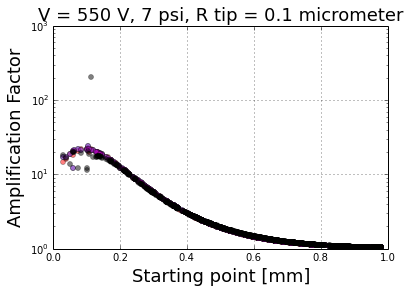

In [389]:
fig_M=plt.figure()
radius_v_100=radius_v
M_v_100=M_v
plt.plot(np.array(radius_v_01)*10,M_v_01,'ro',markersize=5,alpha=0.5,label='0.1 micron')
plt.plot(np.array(radius_v_1)*10,M_v_1,'co',markersize=5,alpha=0.5,label='1 micron')
plt.plot(np.array(radius_v_1)*10,M_v_1,'mo',markersize=5,alpha=0.5,label='10 micron')
plt.plot(np.array(radius_v_100)*10,M_v_100,'ko',markersize=5,alpha=0.5,label='100 micron')
#plt.hist2d(np.array(radius_v)*10,np.log10(M_v),bins=(np.linspace(0,0.1,20),np.linspace(1,10,20)))
plt.grid()
plt.yscale('log')
#plt.ylim([1e3,1e8])
plt.xlabel('Starting point [mm]',fontsize=18)
plt.ylabel('Amplification Factor',fontsize=18)
#plt.legend(numpoints=1,fontsize=18, loc='upper left')
plt.title('V = %s V, %s psi, R tip = %s micrometer'%(volt,psi, rtip),fontsize=18)
#plt.xlim([-0.36,-0.34])
plt.show()
#fig_M.savefig(PATH+'/%spsi/MvsRadius.png'%psi)

In [46]:
Elec_final=[]
for file in datafile_v[0:len(datafile_v)/2]:
    
    str_coord=open(PATH+file,"r")
    
    
    for line in str_coord:
        words = line.split()
        #print(words[-1])
        Elec_final.append(float(words[-1]))

In [341]:
radius_40=radius_v
M_40=M_v

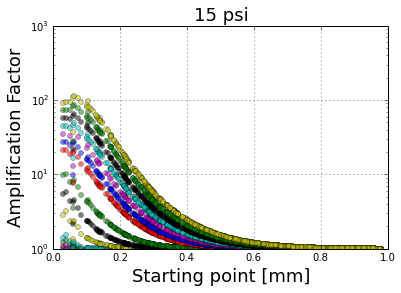

In [342]:
fig_M=plt.figure()
plt.plot(np.array(radius_40)*10,M_40,'ko',markersize=5,alpha=0.5)
plt.plot(np.array(radius_60)*10,M_60,'mo',markersize=5,alpha=0.5)
plt.plot(np.array(radius_80)*10,M_80,'go',markersize=5,alpha=0.5)
plt.plot(np.array(radius_100)*10,M_100,'co',markersize=5,alpha=0.5)
plt.plot(np.array(radius_200)*10,M_200,'yo',markersize=5,alpha=0.5)
plt.plot(np.array(radius_300)*10,M_300,'ko',markersize=5,alpha=0.5)
plt.plot(np.array(radius_400)*10,M_400,'go',markersize=5,alpha=0.5)
plt.plot(np.array(radius_550)*10,M_550,'ro',markersize=5,alpha=0.5)
plt.plot(np.array(radius_600)*10,M_600,'bo',markersize=5,alpha=0.5)
plt.plot(np.array(radius_650)*10,M_650,'mo',markersize=5,alpha=0.5)
plt.plot(np.array(radius_700)*10,M_700,'co',markersize=5,alpha=0.5)
plt.plot(np.array(radius_750)*10,M_750,'ko',markersize=5,alpha=0.5)
plt.plot(np.array(radius_800)*10,M_800,'go',markersize=5,alpha=0.5)
plt.plot(np.array(radius_850)*10,M_850,'yo',markersize=5,alpha=0.5)
#plt.hist2d(np.array(radius_v)*10,np.log10(M_v),bins=(np.linspace(0,0.1,20),np.linspace(1,10,20)))
plt.grid()
plt.yscale('log')
#plt.ylim([1e3,1e8])
plt.xlabel('Starting point [mm]',fontsize=18)
plt.ylabel('Amplification Factor',fontsize=18)
plt.title('%s psi'%(psi),fontsize=18)
#plt.xlim([-0.,0.1])
plt.show()
#fig_M.savefig(PATH+'/%spsi/MvsRadius.png'%psi)

In [343]:
points40 = zip(radius_40,M_40)
points40=sorted(points40)
integrale40=0
points60 = zip(radius_60,M_60)
points60=sorted(points60)
integrale60=0
points80 = zip(radius_80,M_80)
points80=sorted(points80)
integrale80=0
points100 = zip(radius_100,M_100)
points100=sorted(points100)
integrale100=0
points200 = zip(radius_200,M_200)
points200=sorted(points200)
integrale200=0
points300 = zip(radius_300,M_300)
points300=sorted(points300)
integrale300=0
points400 = zip(radius_400,M_400)
points400=sorted(points400)
integrale400=0
points550 = zip(radius_550,M_550)
points550=sorted(points550)
integrale550=0
points600 = zip(radius_600,M_600)
points600=sorted(points600)
integrale600=0
points650 = zip(radius_650,M_650)
points650=sorted(points650)
integrale650=0
points700 = zip(radius_700,M_700)
points700=sorted(points700)
integrale700=0
points750 = zip(radius_750,M_750)
points750=sorted(points750)
integrale750=0
points800 = zip(radius_800,M_800)
points800=sorted(points800)
integrale800=0
points850 = zip(radius_850,M_850)
points850=sorted(points850)
integrale850=0
integrali_M=[]
for i in range(len(points40)-1):
    integrale40+=points40[i+1][1]#*(points40[i+1][0]-points40[i][0])*10.
    integrale60+=points60[i+1][1]#*(points60[i+1][0]-points60[i][0])*10.
    integrale80+=points80[i+1][1]#*(points80[i+1][0]-points80[i][0])*10.
    integrale100+=points100[i+1][1]#*(points100[i+1][0]-points100[i][0])*10.
    integrale200+=points200[i+1][1]#*(points200[i+1][0]-points200[i][0])*10.
    integrale300+=points300[i+1][1]#*(points300[i+1][0]-points300[i][0])*10.
    integrale400+=points400[i+1][1]#*(points400[i+1][0]-points400[i][0])*10.
    integrale550+=points550[i+1][1]#*(points550[i+1][0]-points550[i][0])*10.
    integrale600+=points600[i+1][1]#*(points600[i+1][0]-points600[i][0])*10.
    #integrale650+=points650[i+1][1]*(points650[i][0]-points650[i+1][0])
    integrale700+=points700[i+1][1]#*(points700[i+1][0]-points700[i][0])*10.
    integrale750+=points750[i+1][1]#*(points750[i+1][0]-points750[i][0])*10.
    integrale800+=points800[i+1][1]#*(points800[i+1][0]-points800[i][0])*10.
    integrale850+=points850[i+1][1]#*(points850[i+1][0]-points850[i][0])*10.

integrali_M.append(integrale40/1000.)
integrali_M.append(integrale60/1000.)
integrali_M.append(integrale80/1000.)
integrali_M.append(integrale100/1000.)
integrali_M.append(integrale200/1000.)
integrali_M.append(integrale300/1000.)
integrali_M.append(integrale400/1000.)
integrali_M.append(integrale550/1000.)
integrali_M.append(integrale600/1000.)
#integrali_M.append(integrale650/1000.)
integrali_M.append(integrale700/1000.)
integrali_M.append(integrale750/1000.)
integrali_M.append(integrale800/1000.)
integrali_M.append(integrale850/1000.)
voltaggi=[40,60,80,100,200,300,400,550,600,700,750,800,850]

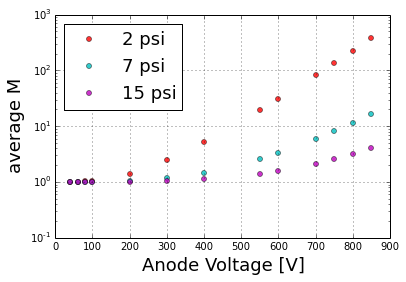

In [350]:
fig_integrali=plt.figure()
plt.plot(voltaggi,integrali_M_2psi,'ro',markersize=5,alpha=0.8,label='2 psi')
plt.plot(voltaggi,integrali_M_7psi,'co',markersize=5,alpha=0.8,label='7 psi')
plt.plot(voltaggi,integrali_M_15psi,'mo',markersize=5,alpha=0.8,label='15 psi')

plt.grid()
plt.yscale('log')
#plt.ylim([1e3,1e8])
plt.legend(numpoints=1,fontsize=18, loc='upper left')
plt.xlabel('Anode Voltage [V]',fontsize=18)
plt.ylabel('average M',fontsize=18)
#plt.title('%s psi'%(psi),fontsize=18)
#plt.xlim([-0.,0.1])
plt.show()

In [345]:
print integrali_M

[0.9990526200997949, 0.9993121705600518, 0.999863778092431, 1.0007625800720823, 1.0128748113494535, 1.0463574035688508, 1.1199114121451301, 1.3873760606503687, 1.5532641187978344, 2.0993509156186017, 2.5374570631074045, 3.144330770219918, 3.9868930182221862]


In [346]:
integrali_M_2psi=[1.0032573640628544, 1.0117302897819078, 1.0270796641870383, 1.0515309689886105, 1.4005494000042615, 2.4582847067075377, 5.184206385399438, 19.20317195685412, 30.694185057409467, 81.23700582474123, 134.18517505324695, 223.6550860357418, 375.95476055016934]
integrali_M_7psi=[0.9994799729397519, 1.0005964340582922, 1.0025798866982458, 1.0056533702845531, 1.0467084915816318, 1.1655277745472359, 1.443401744252637, 2.553364415799052, 3.2927989374457622, 5.913810729543692, 8.173891417302688, 11.4811521138832, 16.34402039594891]
integrali_M_15psi=[0.9990526200997949, 0.9993121705600518, 0.999863778092431, 1.0007625800720823, 1.0128748113494535, 1.0463574035688508, 1.1199114121451301, 1.3873760606503687, 1.5532641187978344, 2.0993509156186017, 2.5374570631074045, 3.144330770219918, 3.9868930182221862]